<h2>Stroke Prediction:</h2>

*   According to the World Health Organization (WHO) stroke is the 2nd  leading cause of death globally, responsible for approximately 11% of total deaths.
*   This dataset  is used to predict whether a patient is likely to get a stroke based on the input parameters like  gender, age, various diseases, and smoking status. 

*   Each row in the data provides relevant  information about the patient

<h3> Impoting the basic pakages and the dataset </h3>


In [ ]:
# Importing some basic pkg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [ ]:
# Reading the csv file (upload the dataset and import)
# Link : https://drive.google.com/file/d/1sHBjusvlYDQEhOAweqZvCr3NUeqp5P8O/view?usp=sharing
df = pd.read_csv("/content/drive/MyDrive/Datasets/Verzeo/healthcare-dataset-stroke-data.csv")

1. Analysis of the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


0    4861
1     249
Name: stroke, dtype: int64


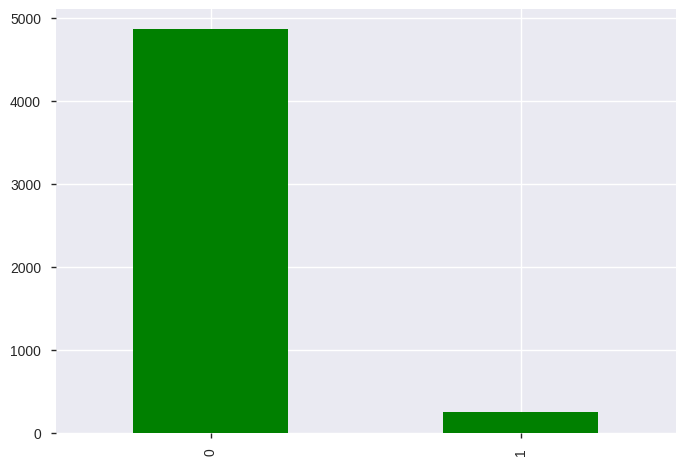

In [ ]:
# Graphical representation 
print(df['stroke'].value_counts())
df['stroke'].value_counts().plot(kind = 'bar', color = 'g')

2. Checking correlations


*   There are some NaN bmi values
*   The Smoking status may/ may not be considered (We haven't considered here)



In [ ]:
corr = df.iloc[:,1:].corr()['stroke']
corr

age                  0.245257
hypertension         0.127904
heart_disease        0.134914
avg_glucose_level    0.131945
bmi                  0.042374
stroke               1.000000
Name: stroke, dtype: float64

3. Managing the NaN values using MICE, dividing to Testing and training set

In [ ]:
!pip install impyute

In [ ]:
from impyute.imputation.cs import mice
from sklearn.model_selection import train_test_split as tts

# Imputing the NaN in "bmi" column
X = df.iloc[:,[2,3,4,8,9]].values
y = df.iloc[:,[11]].values
Imp_X = mice(X)

# Dividing to test and train set
X_train,X_test, y_train, y_test = tts(Imp_X,y,random_state=1)

4. Normalizing/Scaling the data

* Not needed as there aren't any such clusters



5. Training and testing the Model using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_Model = LogisticRegression()
LR_Model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

6. Checking the Accuracy of the Model

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = LR_Model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9413145539906104

<h3>Extra:</h3> Considering the Smoking status too, however the smaking status doesn't the model

In [ ]:
new_df = df
new_df.loc[df['smoking_status'] == "formerly smoked", 'smoking_status'] = 2
new_df.loc[df['smoking_status'] == "never smoked", 'smoking_status'] = 0
new_df.loc[df['smoking_status'] == "smokes", 'smoking_status'] = 1
new_df.loc[df['smoking_status'] == "Unknown", 'smoking_status'] = np.NaN

In [ ]:
new_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,2,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,0,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,0,1


In [ ]:
# Imputing the NaN in "bmi" column
n_X = new_df.iloc[:,[2,3,4,8,9,10]].values
n_y = df.iloc[:,[11]].values
n_Imp_X = mice(X)

# Dividing to test and train set
n_X_train,n_X_test, n_y_train, n_y_test = tts(n_Imp_X,n_y,random_state=1)

# Training the Model
n_LR_Model = LogisticRegression()
LR_Model.fit(n_X_train,n_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score
n_y_pred = LR_Model.predict(n_X_test)
accuracy_score(n_y_test,n_y_pred)

0.9413145539906104